#### K\-Nearest Neighbors

Accuracy = \(Before, 60%\), \(Using Mean, 59%\), \(Using Using the most common number, \)

### Random Forest Classifier

Accuracy = \(Before,  66%\), \(Using Mean, 68%\), \(Using Using the most common number, 69%\)

### Decision Tree Classifier

Accuracy = \(Before,  70%\), \(Using Mean, 63%\), \(Using Using the most common number, 61%\)



In [94]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
data = pd.read_csv("./Data/water_potability.csv")

df['ph'].fillna(df['ph'].replace(7.0), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].replace(333.0), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].replace(66.0), inplace=True)

#df = data
#df['ph'].fillna(int(df['ph'].mean()), inplace=True)
#df['Sulfate'].fillna(int(df['Sulfate'].mean()), inplace=True)
#df['Trihalomethanes'].fillna(int(df['Trihalomethanes'].mean()), inplace=True)


# '''
# data.dropna(axis=0, inplace = True)


# n = abs(data[data["Potability"] == 0].shape[0]- data[data["Potability"] == 1].shape[0])
# data_filtered = data[data["Potability"]==0];
# data_filtered2 = data[data["Potability"] == 1]
# data_filtered = data.drop(index=data_filtered.index[:n], axis=0, inplace=True)
# frames = [data_filtered,data_filtered2]

# data_equal = pd.concat(frames)

# '''


# #try changing data to data_equal for some models --> see if it gets better results -Annya

# # Try with imputed data (try with mean, mode (most common value), etc.)
# # GridSearchCV

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [95]:
target = data["Potability"]
features = data.drop(columns = ["Potability"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
"""params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,param_grid = params,scoring = 'accuracy', cv = 5, verbose = 1,n_jobs = -1)
grid_kn.fit(x_train, y_train)
print(grid_kn.best_params_)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
print(grid_kn.score(x_test, y_test)) """
params = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}
grid_kn = GridSearchCV(estimator = kn,param_grid = params,scoring = 'accuracy', verbose = 1,n_jobs = -1)
grid_kn.fit(x_train, y_train)
print(grid_kn.best_params_)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
print(grid_kn.score(x_test, y_test)) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


ValueError: 
All the 75 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/183af3d5-8548-4a20-9a82-38842b87480b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/183af3d5-8548-4a20-9a82-38842b87480b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 200, in fit
    return self._fit(X, y)
  File "/projects/183af3d5-8548-4a20-9a82-38842b87480b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 407, in _fit
    X, y = self._validate_data(
  File "/projects/183af3d5-8548-4a20-9a82-38842b87480b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/projects/183af3d5-8548-4a20-9a82-38842b87480b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/projects/183af3d5-8548-4a20-9a82-38842b87480b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 899, in check_array
    _assert_all_finite(
  File "/projects/183af3d5-8548-4a20-9a82-38842b87480b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [81]:
predictions = grid_kn.predict(x_test)

In [82]:
y_test.value_counts()

0    497
1    322
Name: Potability, dtype: int64

In [83]:
print(target.shape[0])
print(features.shape[0])

3276
3276


In [84]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

my_KNN_model = GridSearchCV(KNN(), param_grid = parameters)
my_KNN_model.fit(x_train, y_train)
my_KNN_model.best_params_

{'n_neighbors': 2}

0.40415140415140416
0.5958485958485958
0.20240963855421687


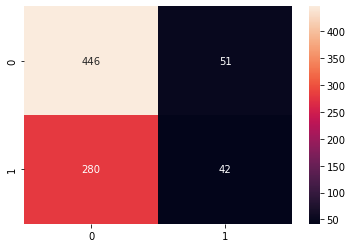

In [85]:
KNN_model_2 = KNN(n_neighbors = 12)
KNN_model_2.fit(x_train, y_train)
from sklearn.metrics import f1_score


y_hat = KNN_model_2.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat)**2))/len(y_test)
print(mean_squared_error)
print(KNN_model_2.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True, fmt ='g')
score = f1_score(y_test, y_hat, average='binary')
print(score)


### RandomForestClassifier



In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_param = {
    "n_estimators": [100,120,140,160,180,200],
    "max_features": ["log2", "sqrt", None],
    "min_samples_split": [10,20,30,40]
}

rfc_test = GridSearchCV(RandomForestClassifier(), param_grid = rfc_param).fit(x_train,y_train)
rfc_test.best_params_

{'max_features': None, 'min_samples_split': 10, 'n_estimators': 180}

0.31135531135531136
0.6886446886446886
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       497
           1       0.69      0.38      0.49       322

    accuracy                           0.69       819
   macro avg       0.69      0.63      0.63       819
weighted avg       0.69      0.69      0.66       819



<AxesSubplot:>

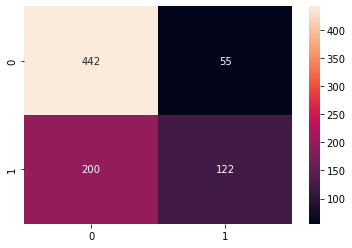

In [93]:
rfc_model = RandomForestClassifier(max_features=None,
                                   min_samples_split=20,
                                   n_estimators=140).fit(x_train, y_train)
y_hat_rfc = rfc_model.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat_rfc)**2)) / len(y_test)
print(mean_squared_error)
print(rfc_model.score(x_test, y_test))
print(classification_report(y_test, y_hat_rfc))
sns.heatmap(confusion_matrix(y_test, y_hat_rfc), annot=True, fmt='g')

### DecisionTreeClassifier



In [89]:
from sklearn.tree import DecisionTreeClassifier

dtc_param = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [20,30,40,50,60,70]
}

dtc_test = GridSearchCV(DecisionTreeClassifier(), param_grid = dtc_param).fit(x_train,y_train)
dtc_test.best_params_

{'max_depth': 9, 'max_leaf_nodes': 50}

0.3907203907203907
0.6092796092796092
              precision    recall  f1-score   support

           0       0.62      0.93      0.74       497
           1       0.51      0.12      0.20       322

    accuracy                           0.61       819
   macro avg       0.57      0.52      0.47       819
weighted avg       0.58      0.61      0.53       819



<AxesSubplot:>

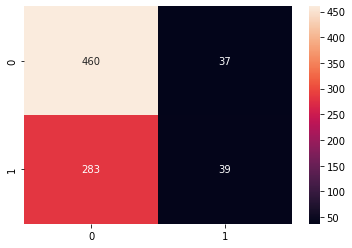

In [90]:


dtc_model = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = 70).fit(x_train,y_train)
y_hat_dtc = dtc_model.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat_dtc)**2))/len(y_test)
print(mean_squared_error)
print(dtc_model.score(x_test,y_test))
print(classification_report(y_test, y_hat_dtc))
sns.heatmap(confusion_matrix(y_test, y_hat_dtc), annot = True, fmt ='g')

In [10]:
# classification_report(y_test, y_hat_dtc, output_dict = True)
print(data[data["Potability"] == 0].shape[0])
print(data[data["Potability"] == 1].shape[0])

811
811


In [11]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

### imputations



In [0]:
# Calculate value to impute with
# Impute with the mean

df = data

df['ph'].fillna(int(df['ph'].mean()), inplace=True)

df['Sulfate'].fillna(int(df['Sulfate'].mean()), inplace=True)

df['Trihalomethanes'].fillna(int(df['Trihalomethanes'].mean()), inplace=True)

data.head(10)


In [56]:
#Impute with the most common number

df['ph'].fillna(df['ph'].replace(7.0), inplace=True)

df['Sulfate'].fillna(df['Sulfate'].replace(333.0), inplace=True)

df['Trihalomethanes'].fillna(df['Trihalomethanes'].replace(66.0), inplace=True)

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
# D = data.values
# x = D[:,0:4]
# y = D[:, 4]
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20)

In [14]:

# model = SVC()
# model.fit(X_train, Y_train)
# #mean_squared_error = (np.sum((y_test - y_hat)**2))/len(y_test)

In [1]:
# Y_pred = model.predict(X_test)
# print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
# print("Precision:", metrics.precision_score(Y_test, Y_pred))
# print("Recall:", metrics.recall_score(Y_test, Y_pred))
# print("Mean-Squared-Error:", mean_squared_error)